In [1]:
import math
import time

import numpy as np
import torch
from torch.distributions import Multinomial
from d2l import torch as d2l

In [9]:
fair_probs = torch.ones([6]) / 6
a = Multinomial(1, fair_probs).sample((5,))
print(a)
a.cumsum(dim=0)

tensor([[0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.]])


tensor([[0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 2., 0.],
        [1., 0., 0., 0., 2., 0.],
        [1., 1., 0., 0., 2., 0.],
        [1., 1., 0., 0., 3., 0.]])

In [4]:
counts = Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1590, 0.1490, 0.1790, 0.1710, 0.1780, 0.1640])

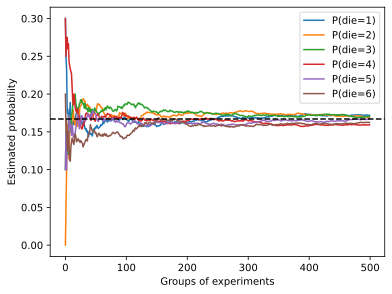

In [6]:
counts = Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

In [15]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [19]:
class Timer:
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动定时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累积时间"""
        return np.array(self.times).cumsum().tolist()

In [22]:
import time
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.10520 sec'

In [23]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00035 sec'

In [24]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

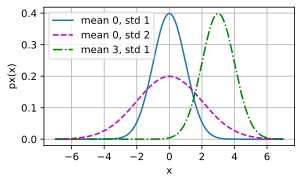

In [27]:
import numpy as np
import math
x = np.arange(-7, 7, 0.01)
# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='px(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])